**Calculadora tensiones elemento diferencial**
------------------------------------------------------------------------------
***

Sirve para analizar tensiones en un elemento de tensión plana con:

$$\sigma_x \,\,,\qquad \sigma_y \,\,, \qquad \tau_{xy} \,\,,$$

- a) Determine las tensiones principales y los correspondientes ángulos principales.
- b) Determine las tensiones tangenciales que se dan junto a las tensiones principales.
- c) Dibuje un croquis de un elemento orientado de forma apropiada con las tensiones principales.
- d) Determine las tensiones tangenciales máximas y los correspondientes ángulos a los que se dan.
- e) Determine las tensiones normales que actúan sobre los planos de tensiones tangenciales máximas.
- f) Dibuje un croquis de un elemento inclinado de forma apropiada con las las tensiones tangenciales máximas.
- g) Repita el apartado a) mediante la diagonalización del tensor de tensiones.
- h) Realice las representaciones gráficas de los apartados anteriores.

**Resolución:**
------------------------------------------------------------------------------

**Inicialización**

Para comenzar, cargaremos las librerías necesarias y definiremos $\sigma_x, \sigma_y,  \tau_{xy}$:

In [10]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from numpy import linalg as LA

#dar valores, nunca hacer sigma o tau totalmente cero ya que se quejará de divisiones por cero (habria que poner un epsilon 1.E-12 p ej. en los denominadores...)

s_x=0.00001 #MPa
s_y=0
t_xy=1

**Tensiones y ángulos principales**

En el apartado a) se pide determinar las tensiones principales y los correspondientes ángulos principales. Primero definiremos las funciones:

$$ \sigma_{x1}=0.5(\sigma_x+\sigma_y)+0.5(\sigma_x-\sigma_y)\cos(2\theta) + \tau_{xy}\sin(2\theta) $$

$$ \tau_{x1y1}=0.5(\sigma_x-\sigma_y)\sin(2\theta) + \tau_{xy}\cos(2\theta) $$

que usaremos más adelante.

In [11]:
def s_x1(theta):        
    return  0.5*(s_x+s_y)+0.5*(s_x-s_y)*cos(2*theta) + t_xy*sin(2*theta)

def t_x1y1(theta):        
    return  -0.5*(s_x-s_y)*sin(2*theta) + t_xy*cos(2*theta)

Ahora vamos a empezar calculando los ángulos $\theta$ asociados a las direcciones principales:

In [12]:
theta_smax1 =0.5*np.arctan(2*t_xy/(s_x-s_y))
theta_smax2 =theta_smax1 - math.pi/2

print("theta_smax1=", theta_smax1*360/(2*math.pi),"º")
print("theta_smax2=", theta_smax2*360/(2*math.pi),"º")

theta_smax1= 44.999856760551225 º
theta_smax2= -45.000143239448775 º


Y bastará con evaluar *s_x1(theta)* y *t_x1y1(theta)* en estos ángulos para calcular las tensiones principales y las tensiones tangenciales que se dan junto a éstas:

In [13]:
print("Apartado a)")
print("")

print("sigma_1=sigma_x1 en theta=",theta_smax1*360/(2*math.pi),"º es:", s_x1(theta_smax1), " MPa")
print("sigma_2=sigma_x1 en theta=",theta_smax2*360/(2*math.pi),"º es:", s_x1(theta_smax2), " MPa")
print("")

print("Apartado b)")
print("")
print("tau_x1y1 en theta=",theta_smax1*360/(2*math.pi),"º es:", t_x1y1(theta_smax1), " MPa")
print("tau_x1y1 en theta=",theta_smax2*360/(2*math.pi),"º es:", t_x1y1(theta_smax2), " MPa")


Apartado a)

sigma_1=sigma_x1 en theta= 44.999856760551225 º es: 1.00000500001250  MPa
sigma_2=sigma_x1 en theta= -45.000143239448775 º es: -0.999995000012500  MPa

Apartado b)

tau_x1y1 en theta= 44.999856760551225 º es: -8.63897373234133e-17  MPa
tau_x1y1 en theta= -45.000143239448775 º es: 2.08854607870387e-16  MPa


**Representación del elemento orientado en las direcciones pricipales**

Para ello, definiremos las coordenadas de los puntos del elemento, así como las de los vectores de tensión, y utilizaremos una matriz de giro para representar el elemento orientado en las direcciones principales.

Text(-0.0207168652550396, 0.120717218840250, '$\\sigma_2$')

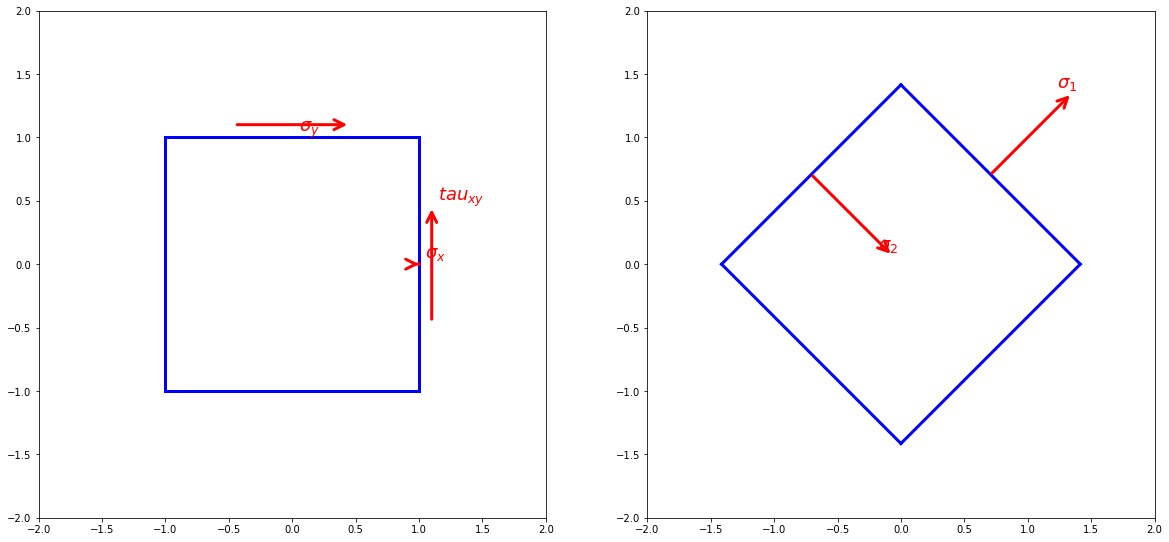

In [14]:
t=theta_smax1

#se define la matriz de giro
G=np.array([[cos(t), -sin(t)], 
          [sin(t), cos(t)]])

#se definen las coordenadas del elemento
P1=np.array([1, 1])
P2=np.array([-1, 1])
P3=np.array([-1, -1])
P4=np.array([1, -1])

#se busca la tensión máxima
tmax=np.amax(np.array([np.abs(s_x),np.abs(s_y),np.abs(t_xy)]))
tmaxP=np.amax(np.array([np.abs(s_x1(theta_smax1)),np.abs(s_x1(theta_smax2))]))
tmax=np.amax(np.array([tmax,tmaxP]))

#Vectores tensiones normales
Pcx=np.array([1, 0])
Pcy=np.array([0, 1])
Pcx2=np.array([1+s_x/tmax*0.9, 0])
Pcy2=np.array([0, 1+s_y/tmax*0.9])

#Vectores tensiones principales
Pcx2P=np.array([1+s_x1(theta_smax1)/tmax*0.9, 0])
Pcy2P=np.array([0, 1+s_x1(theta_smax2)/tmax*0.9])

#Vectores tensiones tangenciales
Ptx1=np.array([1.1, -0.5*t_xy/tmax*0.9])
Ptx2=np.array([1.1, +0.5*t_xy/tmax*0.9])
Pty1=np.array([-0.5*t_xy/tmax*0.9, 1.1])
Pty2=np.array([+0.5*t_xy/tmax*0.9, 1.1])

#Posicion texto
Ptxt1=Pcx2
Ptxt2=Pcy2
Ptxt3=Ptx2
Ptxt4=Pcx2P
Ptxt5=Pcy2P

#Ahora hacemos la figura
filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(1,2,figsize=(20, 10))  #Se define el area del gráfico como un subplot de 2 figuras

ax.set_aspect('equal', adjustable='box') #En la primera figura, llamada "ax", se impone un ratio de aspecto 1:1
ax.set(xlim=(-2, 2), ylim=(-2, 2)) #Se imponen los límites de los ejes

ax.plot((P1[0],P2[0]),(P1[1],P2[1]), color='blue',linewidth=3)
ax.plot((P2[0],P3[0]),(P2[1],P3[1]), color='blue',linewidth=3)
ax.plot((P3[0],P4[0]),(P3[1],P4[1]), color='blue',linewidth=3)
ax.plot((P1[0],P4[0]),(P1[1],P4[1]), color='blue',linewidth=3)
ax.annotate("", (Pcx2[0],Pcx2[1]), (Pcx[0],Pcx[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax.annotate("", (Pcy2[0],Pcy2[1]), (Pcy[0],Pcy[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax.annotate("", (Ptx2[0],Ptx2[1]), (Ptx1[0],Ptx1[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax.annotate("", (Pty2[0],Pty2[1]), (Pty1[0],Pty1[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})

ax.text(Ptxt1[0]+0.05, Ptxt1[1]+0.05, "$\sigma_x$", size=18, color='r', va="baseline", ha="left", multialignment="left")
ax.text(Ptxt2[0]+0.05, Ptxt2[1]+0.05, "$\sigma_y$", size=18, color='r', va="baseline", ha="left", multialignment="left")
ax.text(Ptxt3[0]+0.05, Ptxt3[1]+0.05, "$tau_{xy}$", size=18, color='r', va="baseline", ha="left", multialignment="left")

#Para la segunda figura, aplicamos el giro con un producto de la matriz G por los vectores
P1=np.dot(G,P1)
P2=np.dot(G,P2)
P3=np.dot(G,P3)
P4=np.dot(G,P4)
Pcx=np.dot(G,Pcx)
Pcy=np.dot(G,Pcy)
Pcx2P=np.dot(G,Pcx2P)
Pcy2P=np.dot(G,Pcy2P)

Ptxt4=np.dot(G,Ptxt4)
Ptxt5=np.dot(G,Ptxt5)

ax2.set_aspect('equal', adjustable='box') #En la segunda figura, llamada "ax2", se impone un ratio de aspecto 1:1
ax2.set(xlim=(-2, 2), ylim=(-2, 2)) #Se imponen los límites de los ejes

ax2.plot((P1[0],P2[0]),(P1[1],P2[1]), color='blue',linewidth=3)
ax2.plot((P2[0],P3[0]),(P2[1],P3[1]), color='blue',linewidth=3)
ax2.plot((P3[0],P4[0]),(P3[1],P4[1]), color='blue',linewidth=3)
ax2.plot((P1[0],P4[0]),(P1[1],P4[1]), color='blue',linewidth=3)
ax2.annotate("", (Pcx2P[0],Pcx2P[1]), (Pcx[0],Pcx[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax2.annotate("", (Pcy2P[0],Pcy2P[1]), (Pcy[0],Pcy[1]) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})

ax2.text(Ptxt4[0]+0.05, Ptxt4[1]+0.05, "$\sigma_1$", size=18, color='r', va="baseline", ha="right", multialignment="left")
ax2.text(Ptxt5[0]+0.05, Ptxt5[1]+0.05, "$\sigma_2$", size=18, color='r', va="baseline", ha="right", multialignment="left")


**Tensiones tangenciales máximas**

Ahora vamos a empezar calculando los ángulos $\theta$ asociados a los planos de $\tau$ máxima:

In [15]:
theta_taumax1 =0.5*np.arctan(-(s_x-s_y)/(2*t_xy))+math.pi/2
theta_taumax2 = theta_taumax1 - math.pi/2 

print("theta_taumax1=", theta_taumax1*360/(2*math.pi),"º")
print("theta_taumax2=", theta_taumax2*360/(2*math.pi),"º")

theta_taumax1= 89.99985676055122 º
theta_taumax2= -0.00014323944877728308 º


Y bastará con evaluar *s_x1(theta)* y *t_x1y1(theta)* en estos ángulos para calcular las tensiones tangenciales máximas y las tensiones normales que se dan junto a éstas:

In [16]:
print("Apartado d)")
print("")
print("tau_x1y1 en theta=",theta_taumax1*360/(2*math.pi),"º es:", t_x1y1(theta_taumax1), " MPa")
print("tau_x1y1 en theta=",theta_taumax2*360/(2*math.pi),"º es:", t_x1y1(theta_taumax2), " MPa")
print("")

print("Apartado e)")
print("")
print("sigma_x1 en theta=",theta_taumax1*360/(2*math.pi),"º es:", s_x1(theta_taumax1), " MPa")
print("sigma_x1 en theta=",theta_taumax2*360/(2*math.pi),"º es:", s_x1(theta_taumax2), " MPa")
print("")

print("Comprobación")
print("La diferencia entre angulos (1) es", theta_taumax1*360/(2*math.pi)-theta_smax1*360/(2*math.pi),"º")
print("La diferencia entre angulos (2) es", theta_taumax2*360/(2*math.pi)-theta_smax2*360/(2*math.pi),"º")


Apartado d)

tau_x1y1 en theta= 89.99985676055122 º es: -1.00000000001250  MPa
tau_x1y1 en theta= -0.00014323944877728308 º es: 1.00000000001250  MPa

Apartado e)

sigma_x1 en theta= 89.99985676055122 º es: 4.99999999997484e-6  MPa
sigma_x1 en theta= -0.00014323944877728308 º es: 5.00000000014762e-6  MPa

Comprobación
La diferencia entre angulos (1) es 45.0 º
La diferencia entre angulos (2) es 45.0 º


**Cálculo de los apartados anteriores utilizando el tensor de tensiones de Cauchy**

El procedimiento anterior se reduce a la resolución de un problema de valores propios. Las tensiones principales son los autovalores de la matriz (matriz diagonal en la que $\tau_{xy}=0$) y las direcciones principales se obtienen de los autovectores de la matriz. La matriz de autovectores es una matriz de cambio de base que permite orientar el elemento diferencial en las direcciones principales.

In [17]:
T=np.array([[s_x, t_xy], #es la manera sencilla de definir matrices usando numpy
          [t_xy, s_y]])

print("El tensor de tensiones es:")
print("T=",T)
print(" ")

s, v = LA.eig(T) #con esto obtenemos los autovalores en el array "s" y autovectores en "v"

v1 = v[:,0]
v2 = v[:,1]


print("Los autovalores de T son:",s[0]," y ",s[1])
print("Los autovectores de T son:",v1,v2)

print("El angulo principal 1 se puede calcular como arco coseno de v[0,0]:",np.arccos(v[0,0])*360/(2*math.pi))
print("El angulo principal 1 se puede calcular como arco coseno de v[0,1]:",np.arccos(v[0,1])*360/(2*math.pi))

El tensor de tensiones es:
T= [[1.e-05 1.e+00]
 [1.e+00 0.e+00]]
 
Los autovalores de T son: 1.0000050000125  y  -0.9999950000125
Los autovectores de T son: [0.70710855 0.70710501] [-0.70710501  0.70710855]
El angulo principal 1 se puede calcular como arco coseno de v[0,0]: 44.99985676055122
El angulo principal 1 se puede calcular como arco coseno de v[0,1]: 134.99985676055124


**Representaciones gráficas**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

Text(0, 0.5, 'sigma y tau (MPa)')

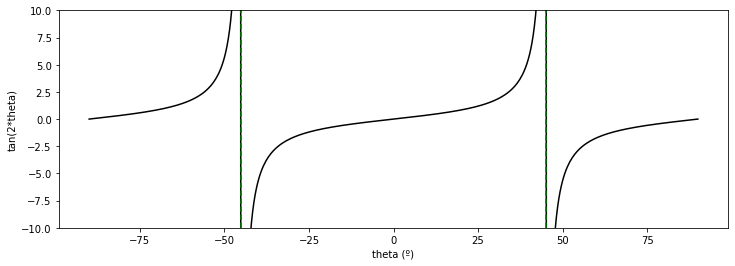

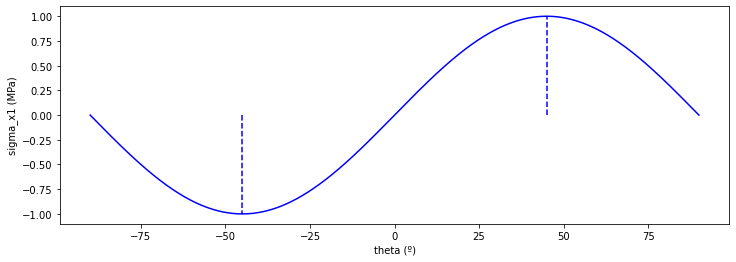

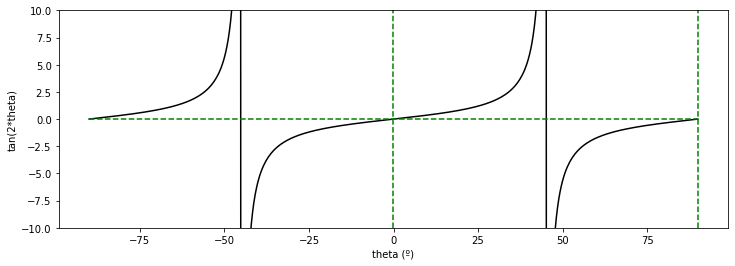

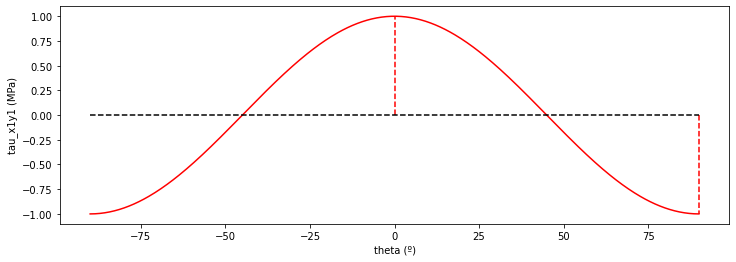

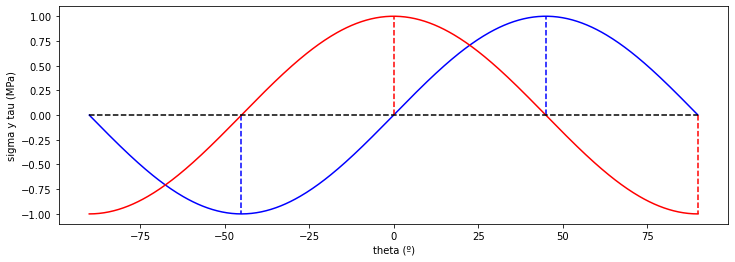

In [18]:
thetamin= -90 ; thetamax=90; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar\n",
tt=np.zeros((nopto,1))
tg=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = thetamin+i*(thetamax-thetamin)/(nopto-1) 
    angle, = yy[i]*2*math.pi/360
    ss[i]=s_x1(angle)
    tt[i]=t_x1y1(angle)
    tg[i]=np.tan(2*angle)

hmax=10
#grafica solucion tangente         
fig, ax1 = plt.subplots(figsize=(12, 4))  
ax1.plot(yy,tg, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
line1=2*t_xy/(s_x-s_y)
ax1.plot([thetamin, thetamax],[line1, line1], color="green",linestyle="--") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax1.plot([theta_smax1*360/(2*math.pi), theta_smax1*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.plot([theta_smax2*360/(2*math.pi), theta_smax2*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax1.set_ylabel("tan(2*theta)") # Nombre y unidades del eje y
ax1.set_ylim((-hmax, hmax))   # set the ylim to bottom, top

#sss
filename="Nombre de la función"
fig, ax = plt.subplots(figsize=(12, 4))   
                          
#ax.set_aspect('equal', adjustable='box')

ax.plot(yy,ss, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_smax1*360/(2*math.pi), theta_smax1*360/(2*math.pi)],[0, max(ss)], color="blue",linestyle="--")
ax.plot([theta_smax2*360/(2*math.pi), theta_smax2*360/(2*math.pi)],[0, min(ss)], color="blue",linestyle="--")
#ax.plot([10, 10],[50, 50], color="blue")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("sigma_x1 (MPa)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda


#grafica solucion tangente         
fig, ax1 = plt.subplots(figsize=(12, 4))  
ax1.plot(yy,tg, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
line1=-(s_x-s_y)/(2*t_xy)
ax1.plot([thetamin, thetamax],[line1, line1], color="green",linestyle="--") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax1.plot([theta_taumax1*360/(2*math.pi), theta_taumax1*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.plot([theta_taumax2*360/(2*math.pi), theta_taumax2*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax1.set_ylabel("tan(2*theta)") # Nombre y unidades del eje y
ax1.set_ylim((-hmax, hmax))   # set the ylim to bottom, top

filename="Nombre de la función"
fig, ax = plt.subplots(figsize=(12, 4))   
                          
#ax.set_aspect('equal', adjustable='box')

ax.plot(yy,tt, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_taumax1*360/(2*math.pi), theta_taumax1*360/(2*math.pi)],[0, min(tt)], color="red",linestyle="--")
ax.plot([theta_taumax2*360/(2*math.pi), theta_taumax2*360/(2*math.pi)],[0, max(tt)], color="red",linestyle="--")
ax.plot([thetamin, thetamax],[0, 0], color="black",linestyle="--")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("tau_x1y1 (MPa)") # Nombre y unidades del eje y




filename="Nombre de la función"
fig, ax = plt.subplots(figsize=(12, 4))   
                          
#ax.set_aspect('equal', adjustable='box')
ax.plot(yy,ss, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_smax1*360/(2*math.pi), theta_smax1*360/(2*math.pi)],[0, max(ss)], color="blue",linestyle="--")
ax.plot([theta_smax2*360/(2*math.pi), theta_smax2*360/(2*math.pi)],[0, min(ss)], color="blue",linestyle="--")
#ax.plot([10, 10],[50, 50], color="blue")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("sigma_x1 (MPa)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda

ax.plot(yy,tt, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_taumax1*360/(2*math.pi), theta_taumax1*360/(2*math.pi)],[0, min(tt)], color="red",linestyle="--")
ax.plot([theta_taumax2*360/(2*math.pi), theta_taumax2*360/(2*math.pi)],[0, max(tt)], color="red",linestyle="--")
ax.plot([thetamin, thetamax],[0, 0], color="black",linestyle="--")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("sigma y tau (MPa)") # Nombre y unidades del eje y